## **Importação dos Dados de Custos Médicos**

Este é um projeto de modelo de regressão linear, para identificar as caracteristicas de uma pessoa, para o custo de plano de saúde dela. (Interese em prever essa variável custos para poder fazer uma precificação do plano de saúde).

In [ ]:
import pandas as pd
url = 'https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv'
dados = pd.read_csv(url)
dados.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# Esse comando da a informação de como os dados foram lidos.

dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# Esse comando vai entregar algumas estatísticas sobre as variáveis númericas

dados.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## **Análise Exploratória dos Dados**

In [ ]:
# instalando biblioteca de visualização

!pip install sweetviz

In [ ]:
import sweetviz as sv

In [ ]:
# Esse comando realiza uma análise exploratória automática

eda = sv.analyze(source = dados, target_feat = 'charges')

                                             |          | [  0%]   00:00 -> (? left)


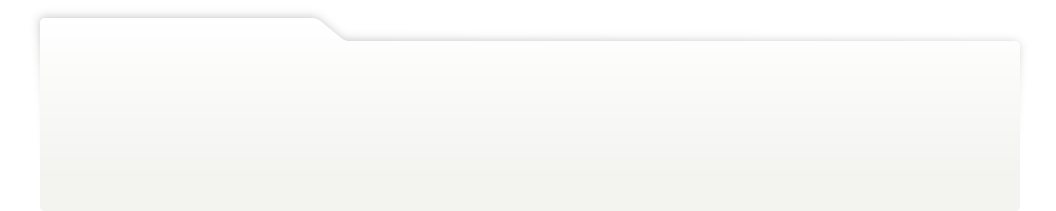
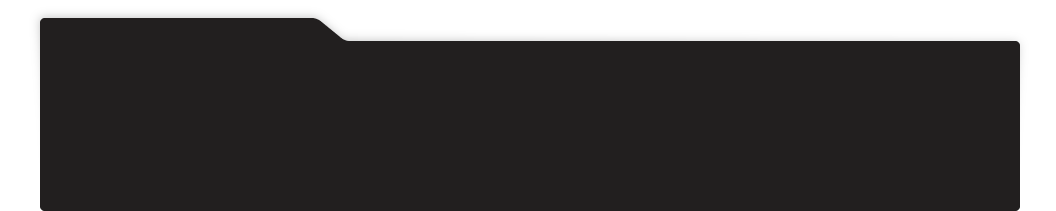
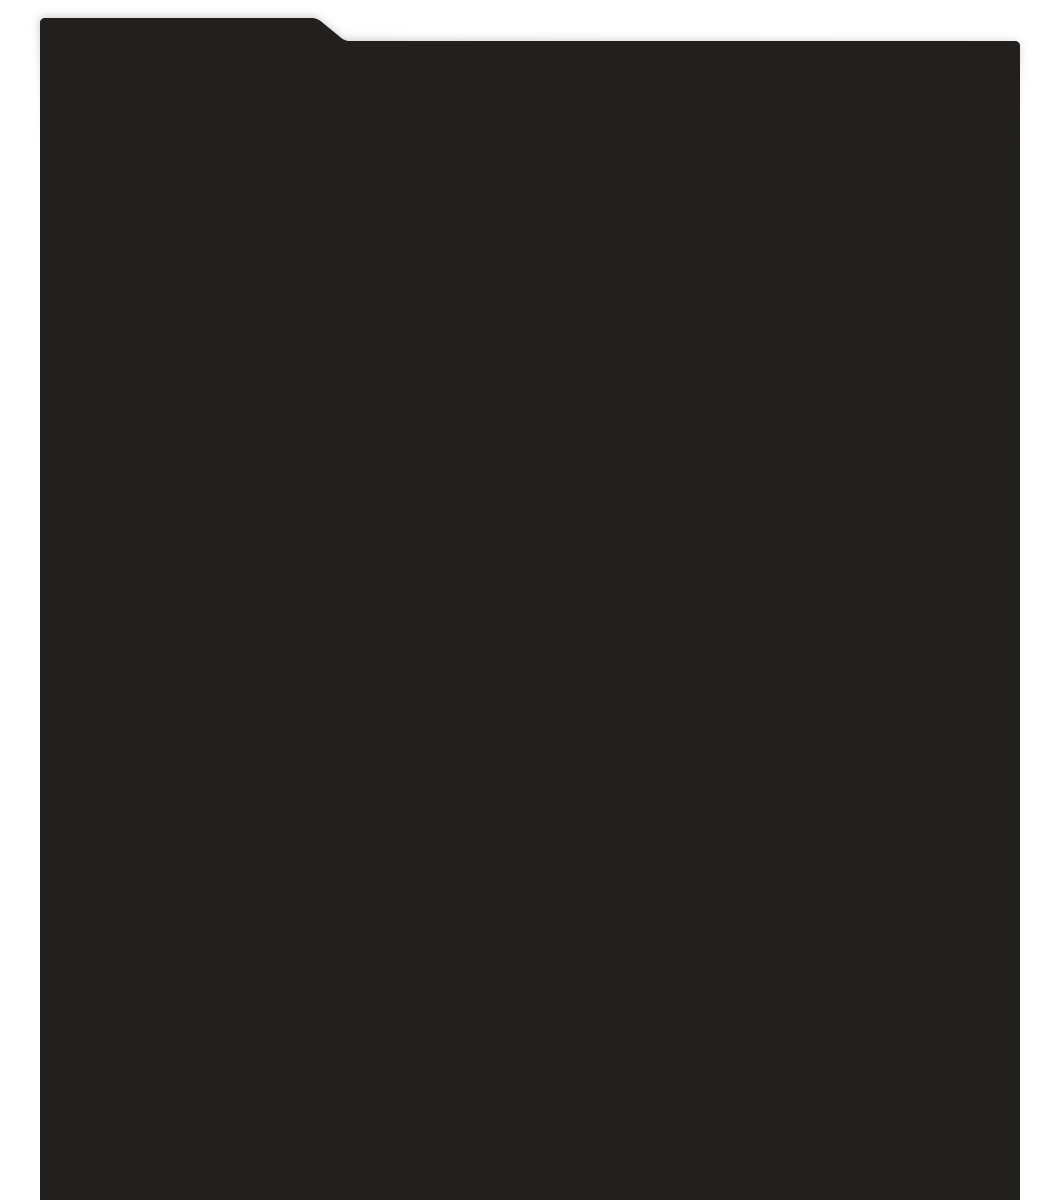
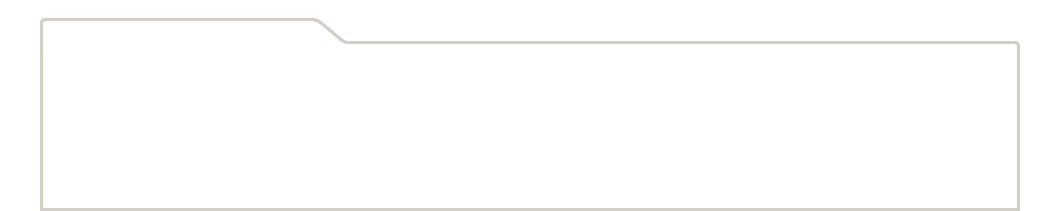
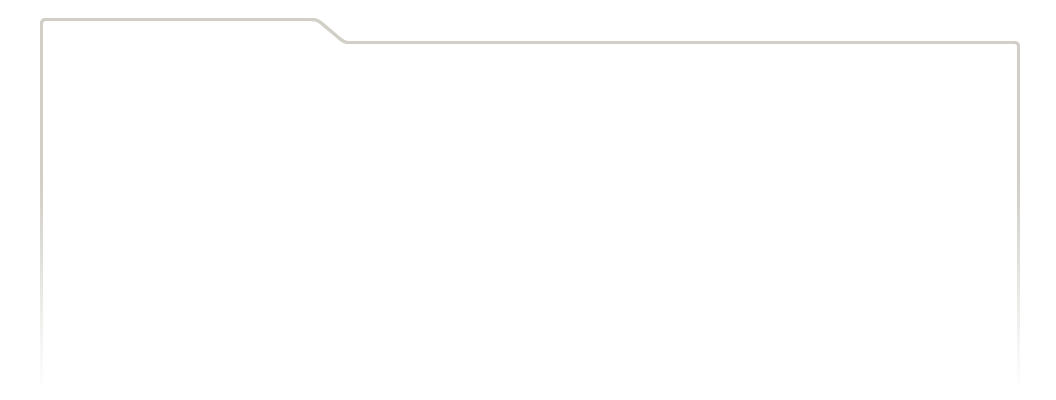
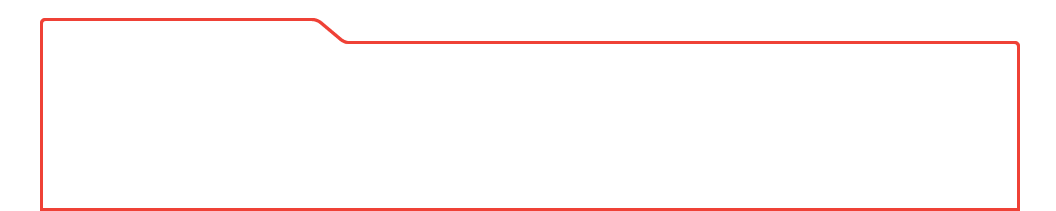
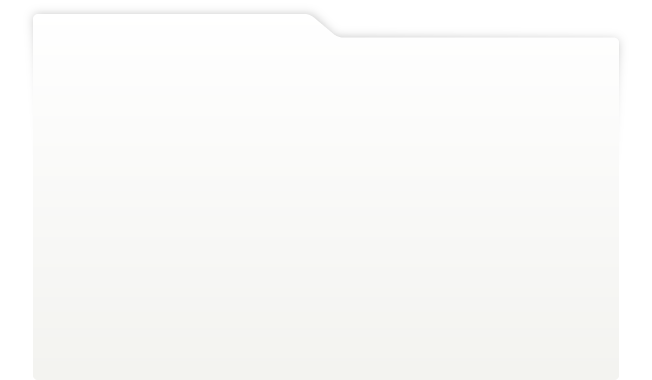
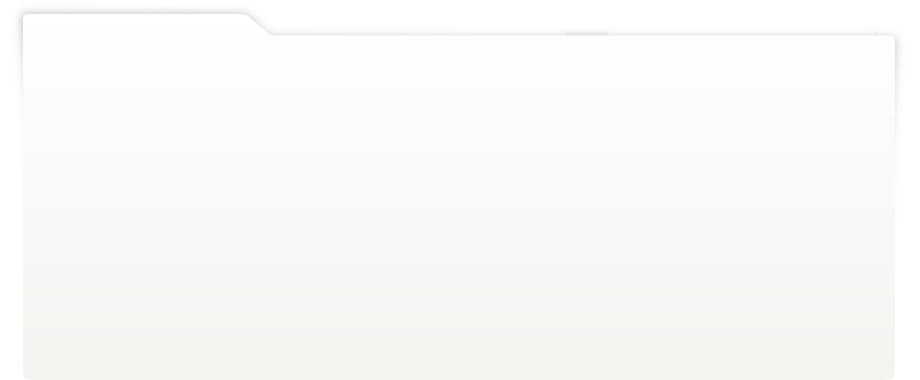
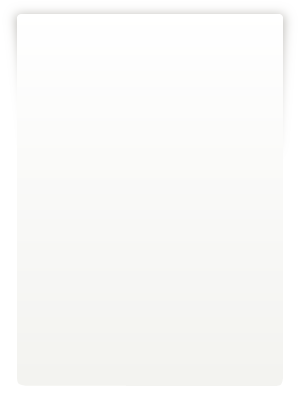
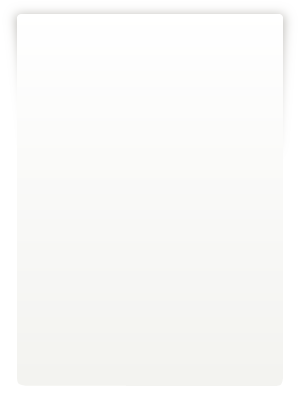
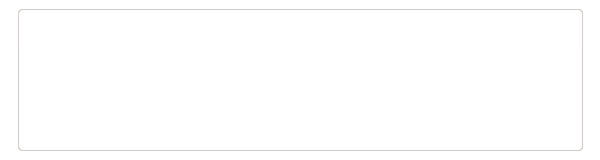
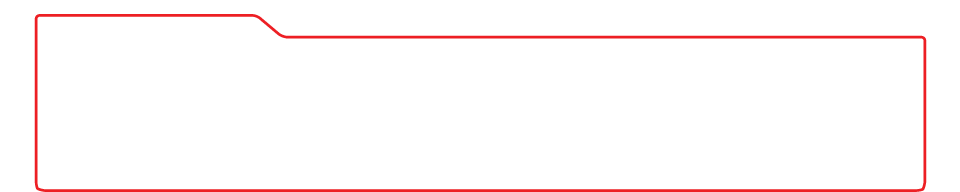
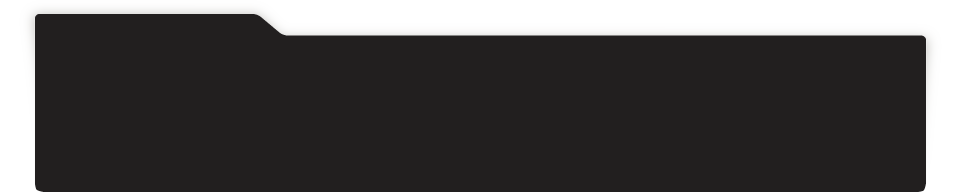
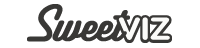
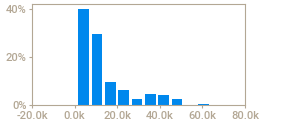
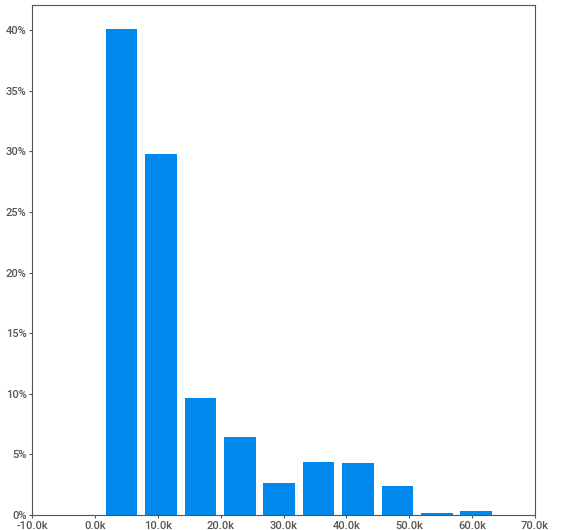
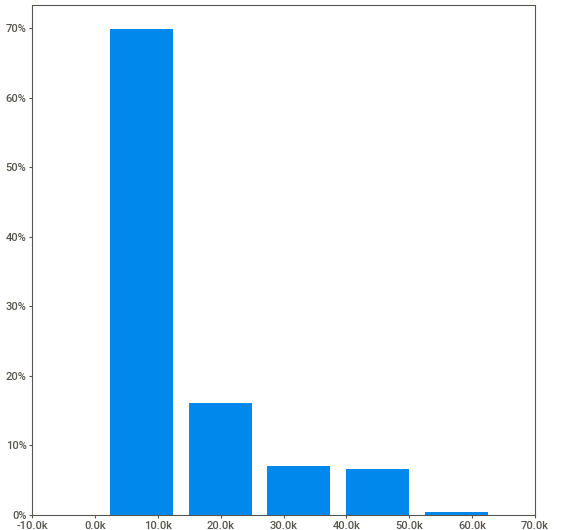
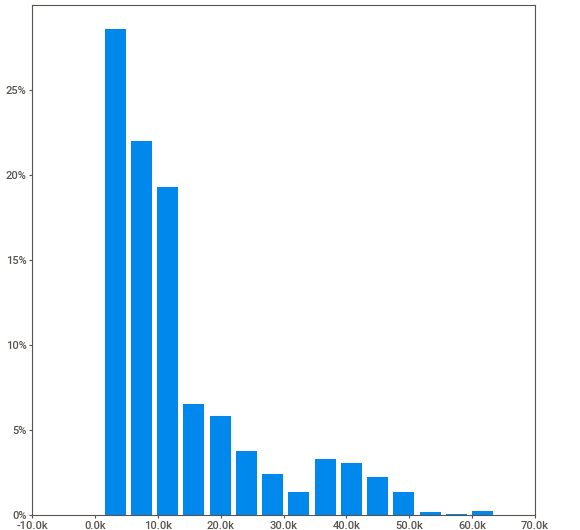
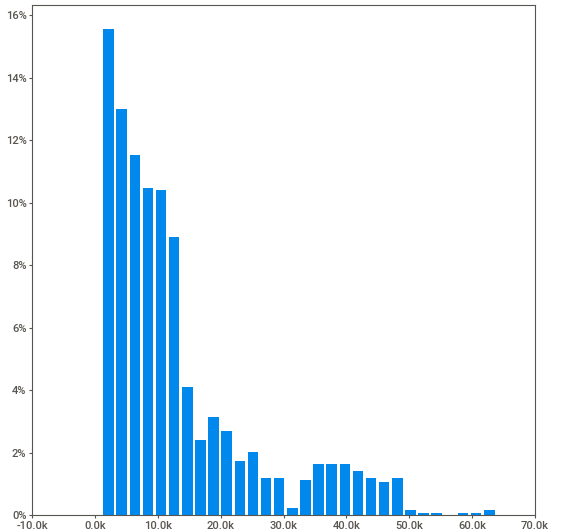
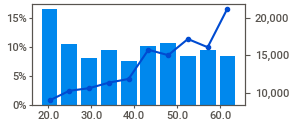
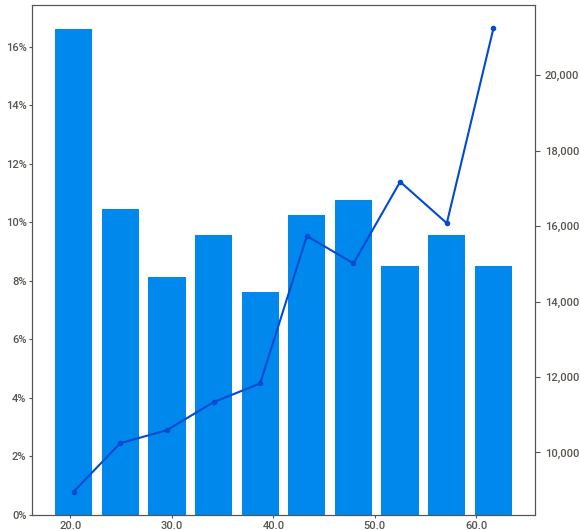
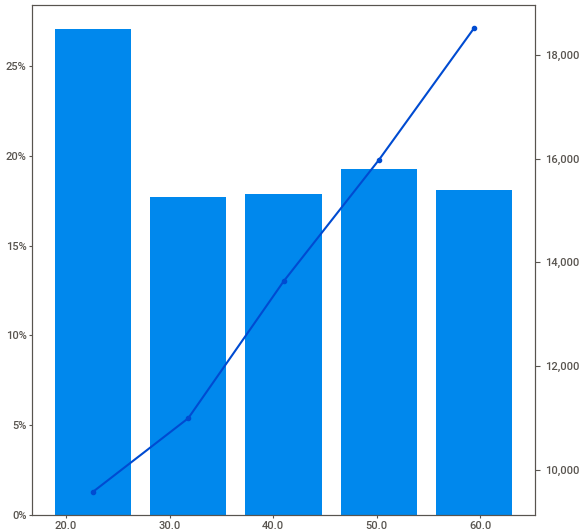
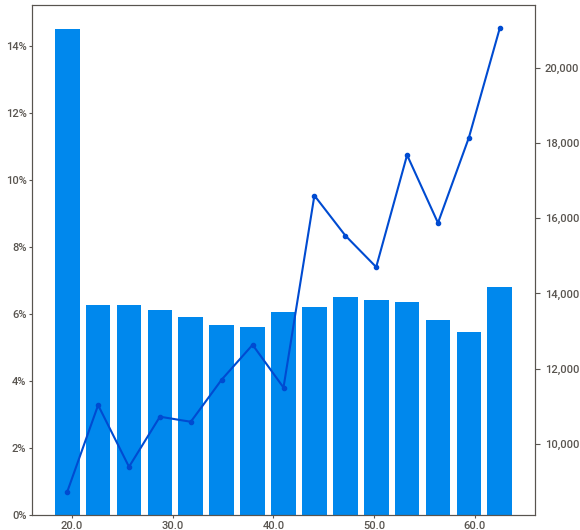
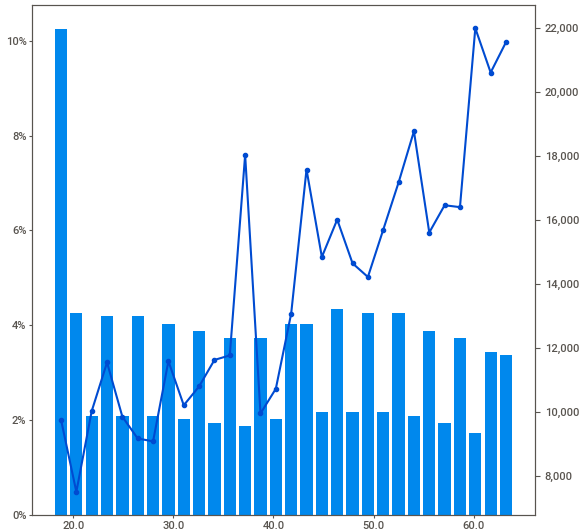
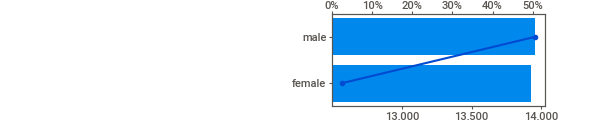
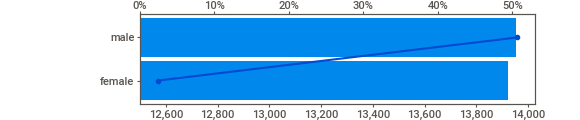
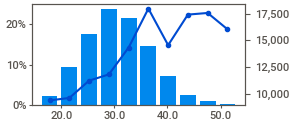
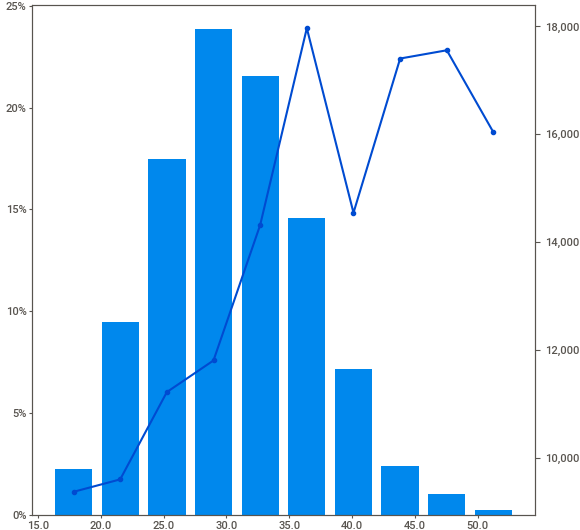
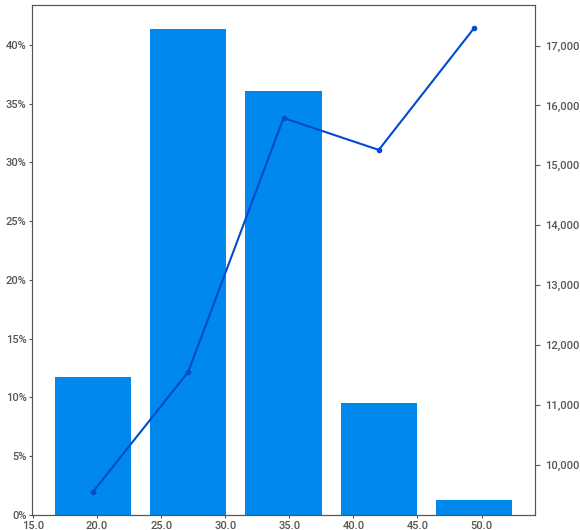
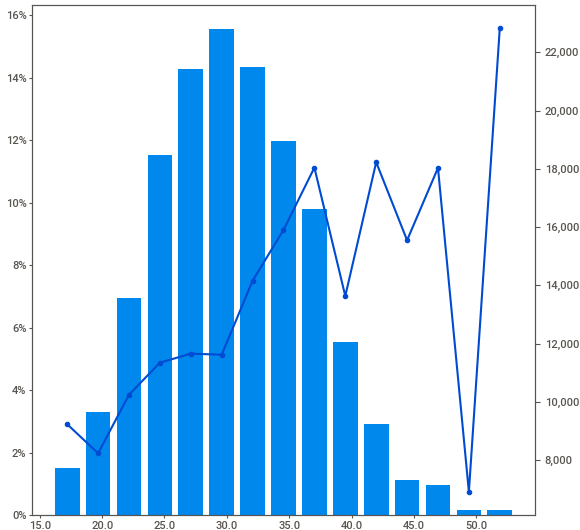
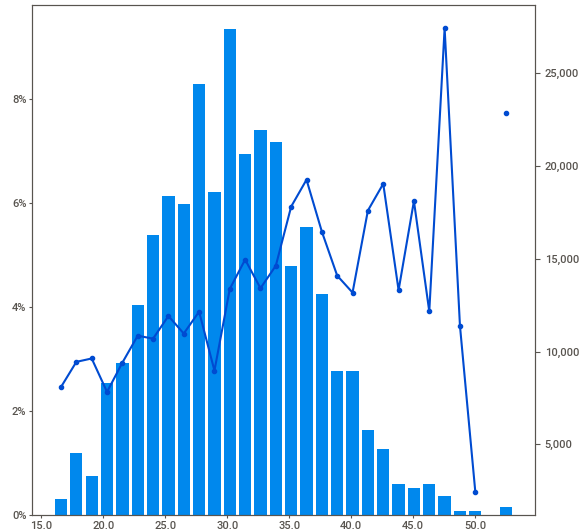
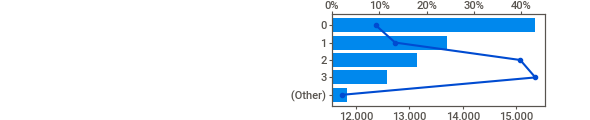
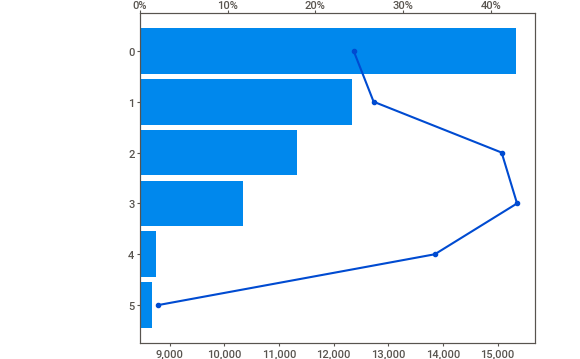
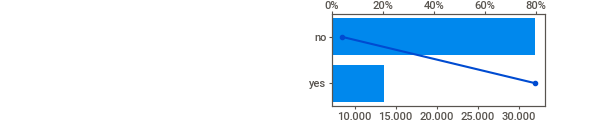
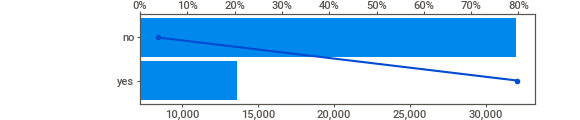
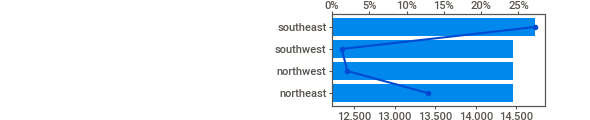
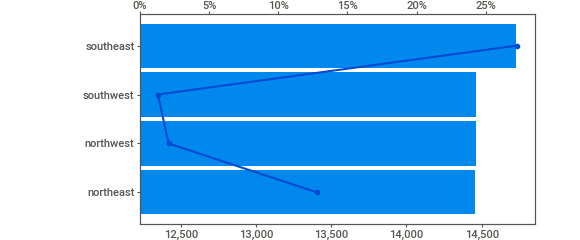
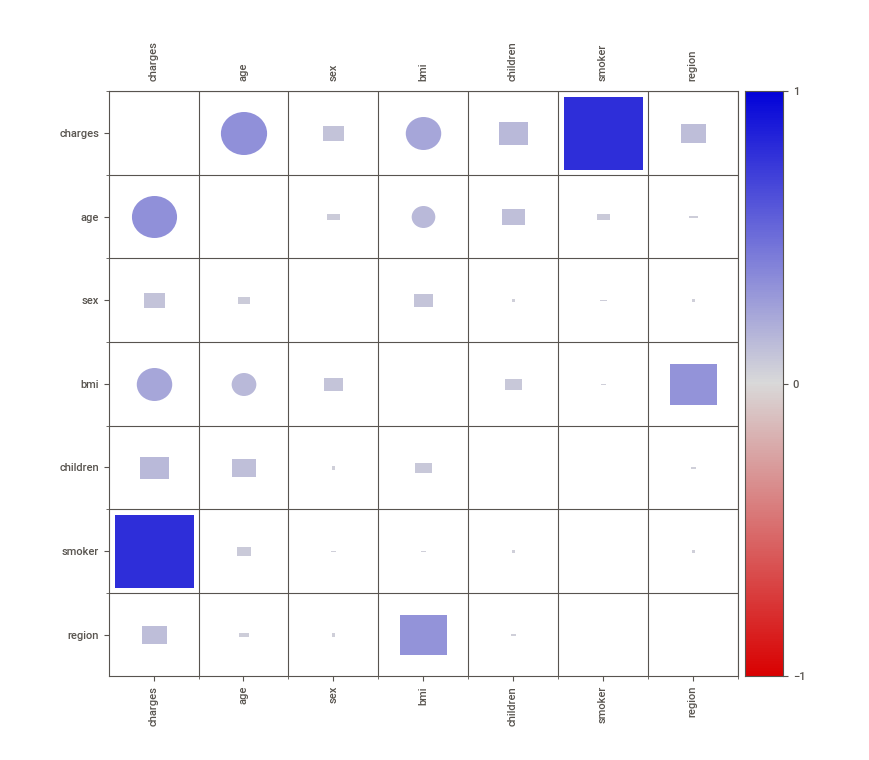
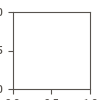

In [ ]:
eda.show_notebook()

In [ ]:
# Função compare_intra faz a analise de dados também comparando com uma variável que você possa contar

eda2 = sv.compare_intra(source_df = dados,
                              condition_series = dados['smoker'] == 'yes',
                              names = ['Fumante', 'Não-Fumante'],
                              target_feat = 'charges')

                                             |          | [  0%]   00:00 -> (? left)


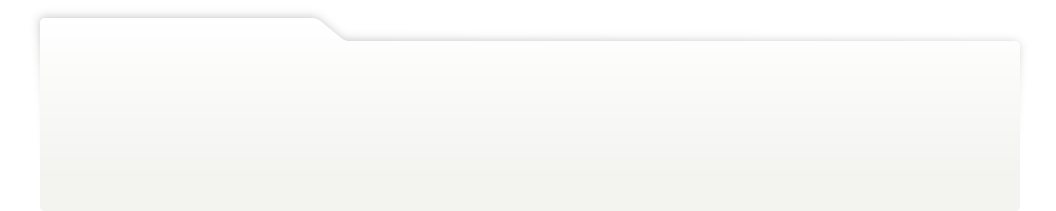
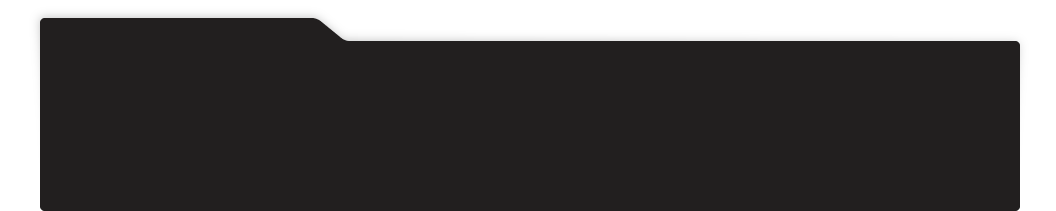
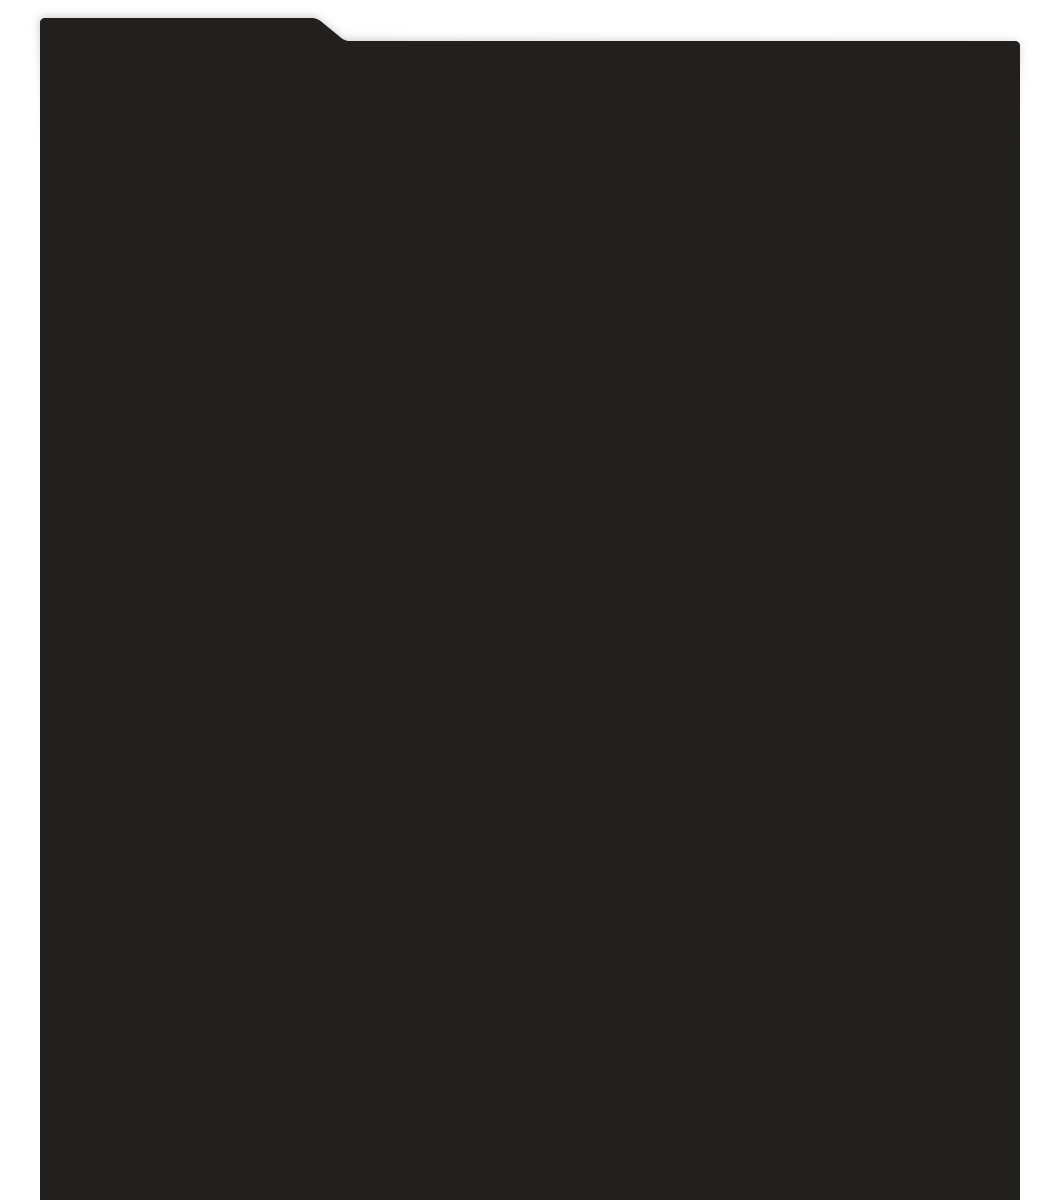
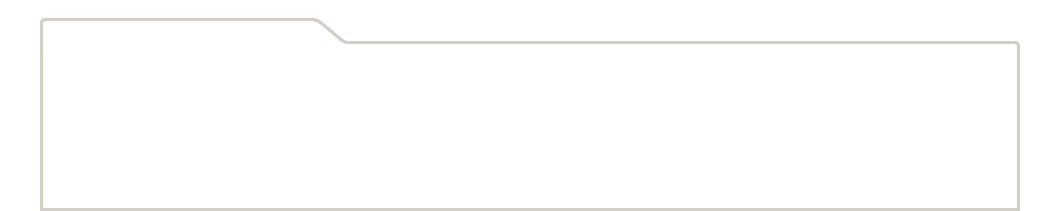
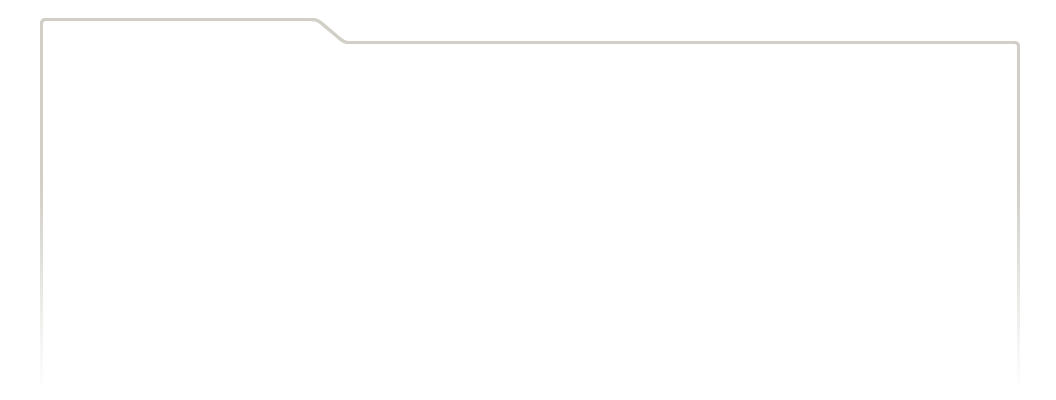
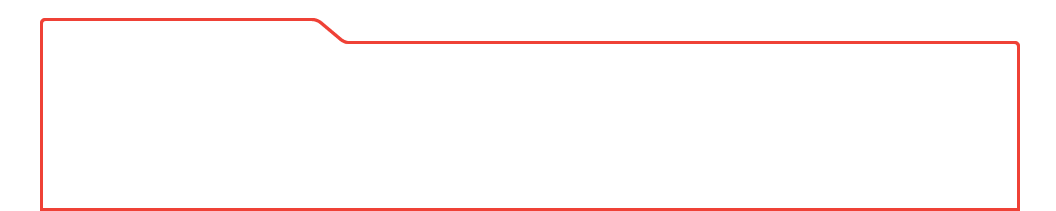
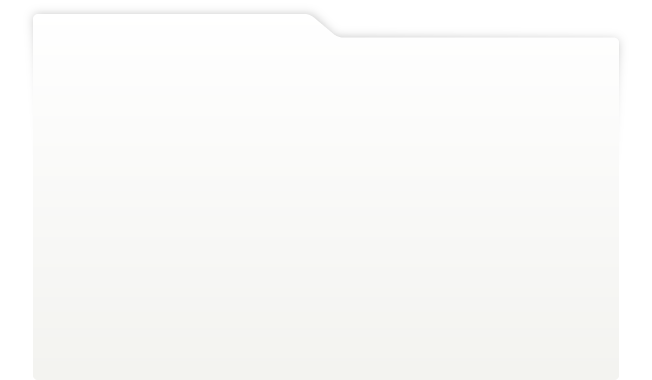
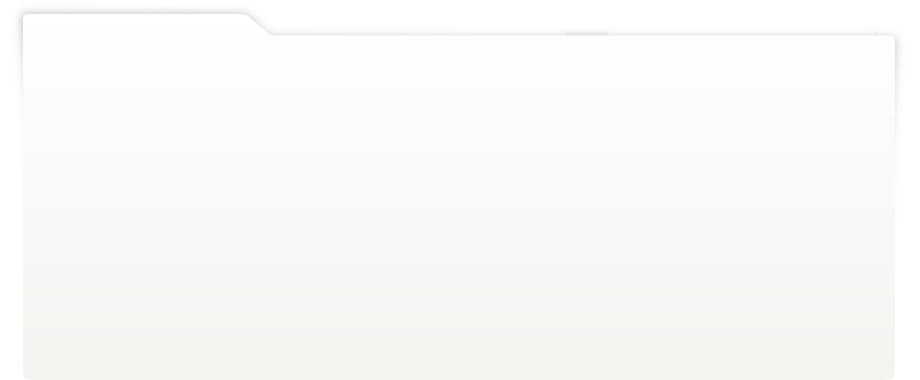
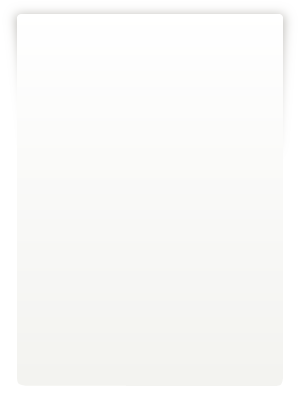
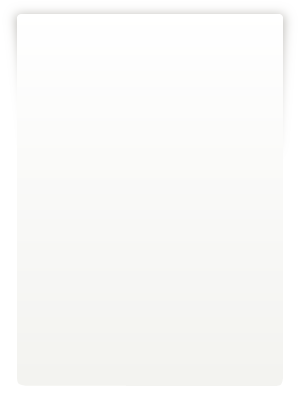
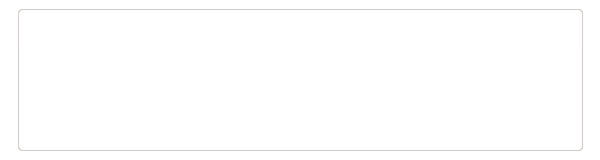
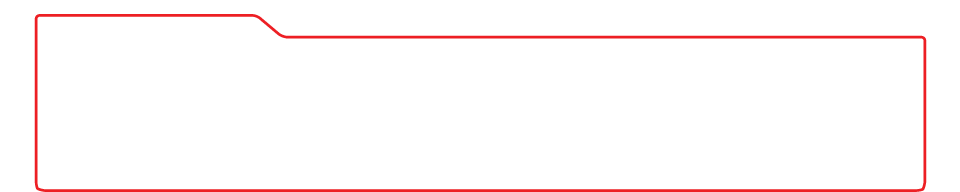
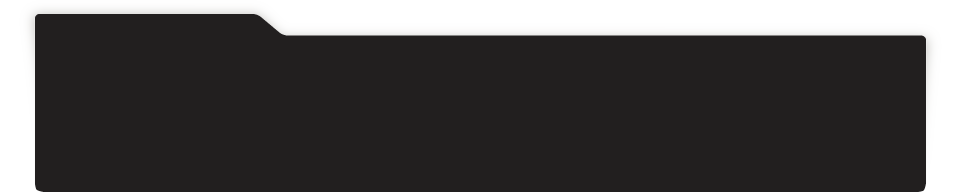
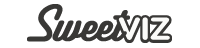
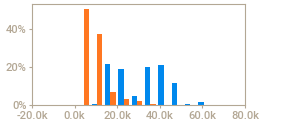
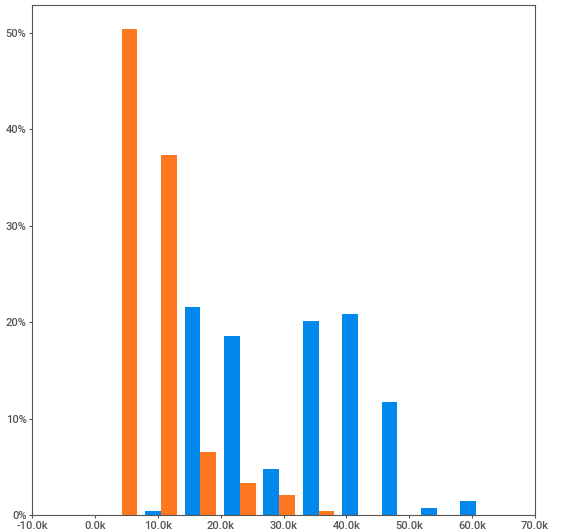
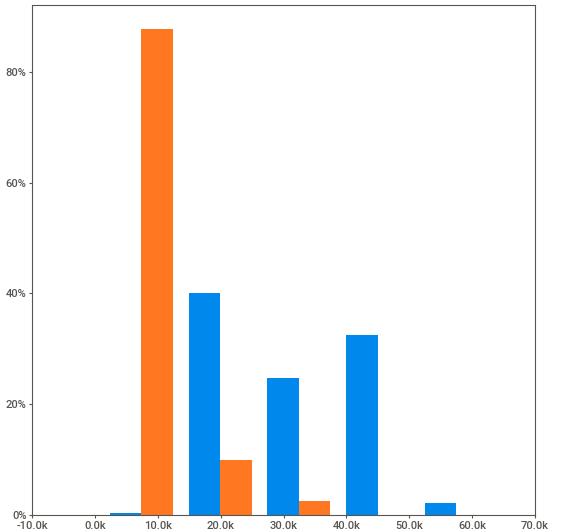
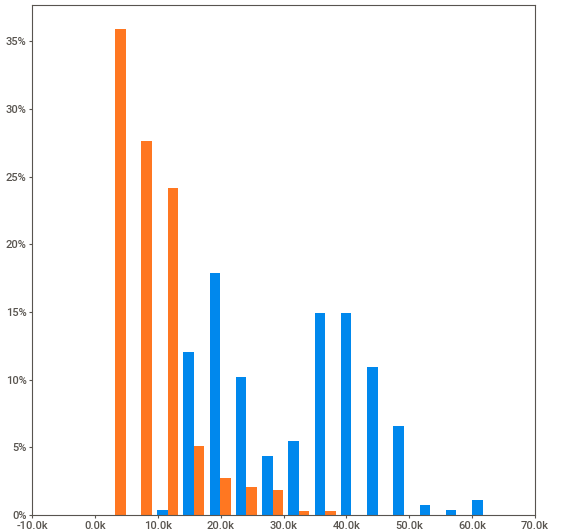
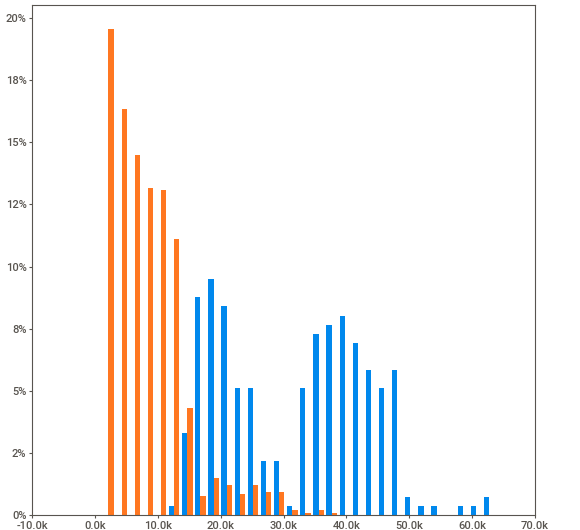
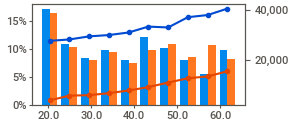
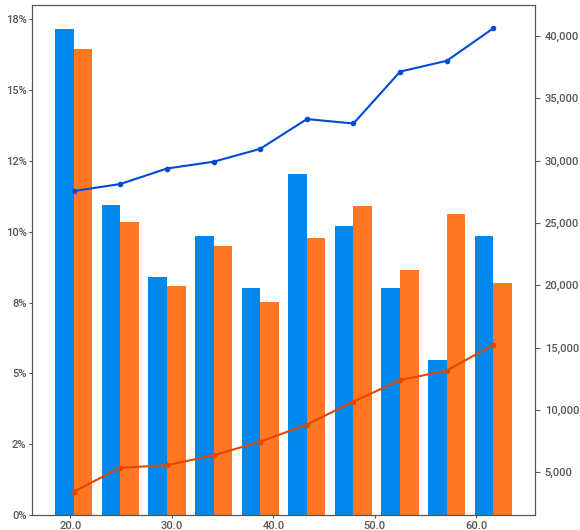
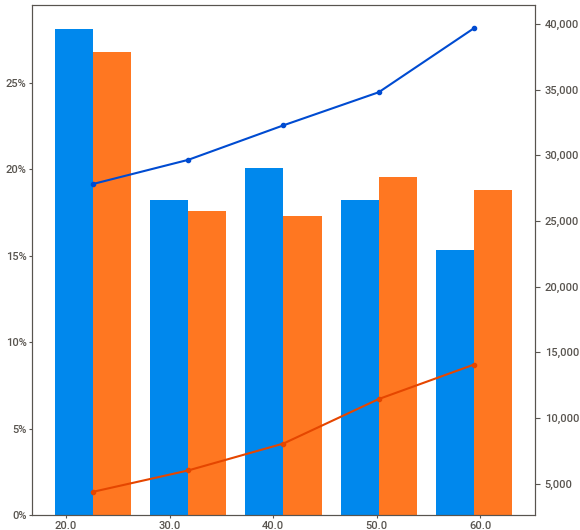
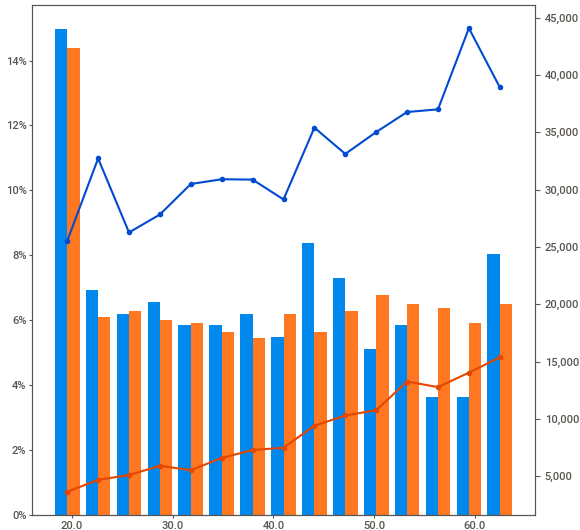
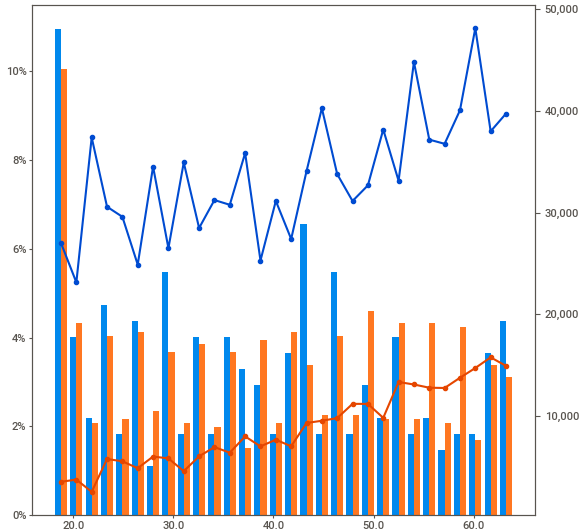
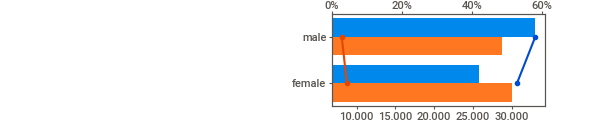
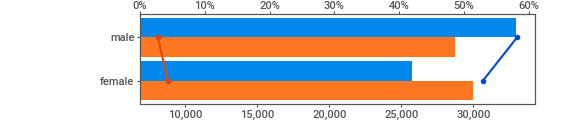
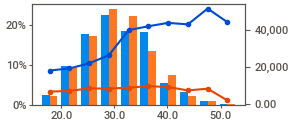
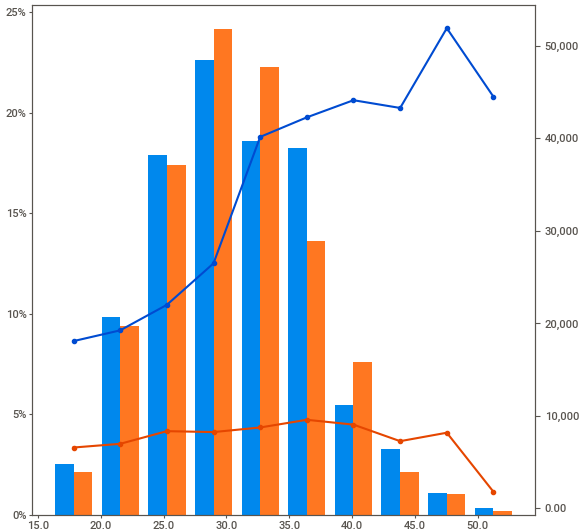
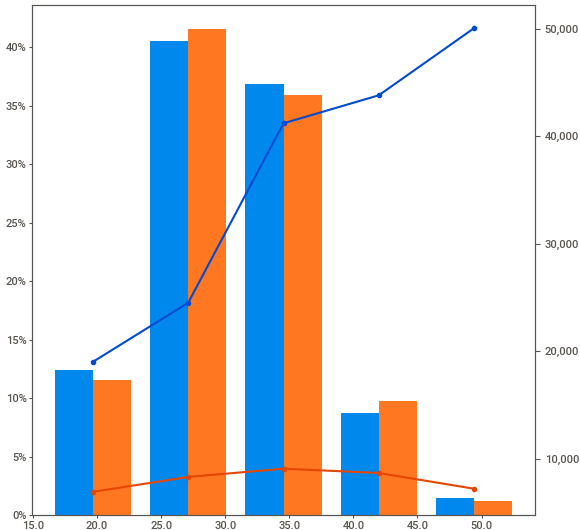
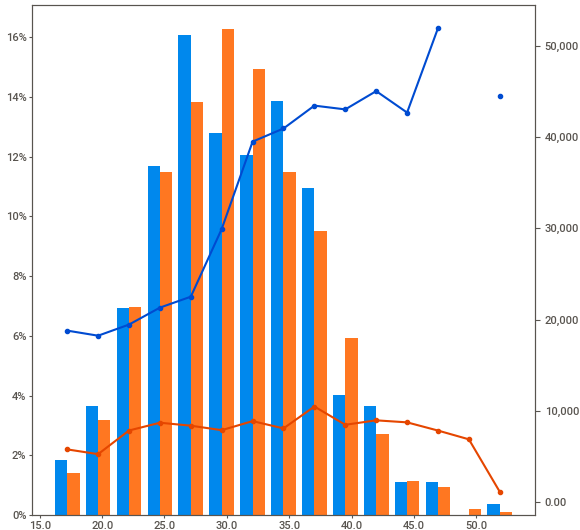
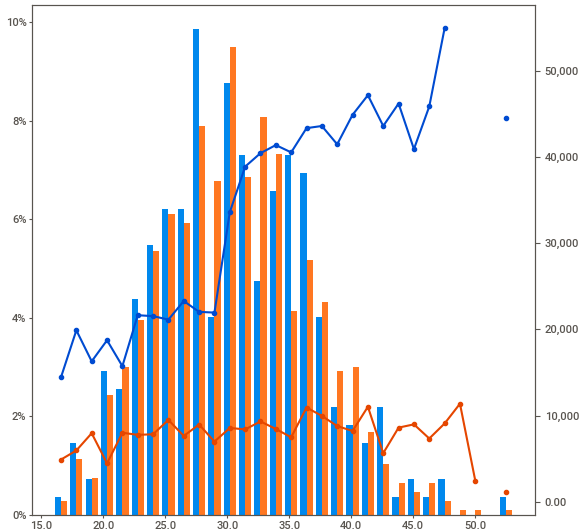
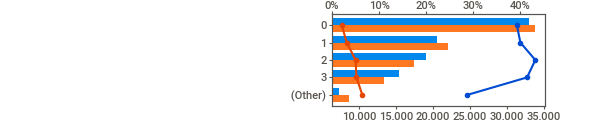
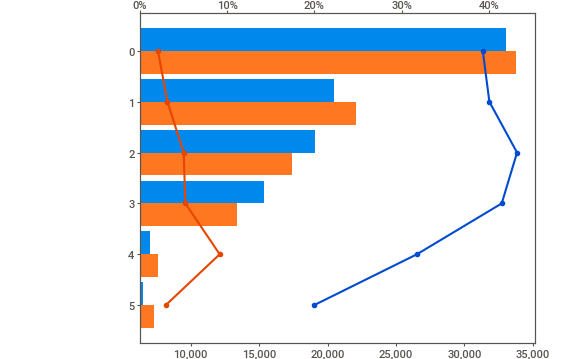
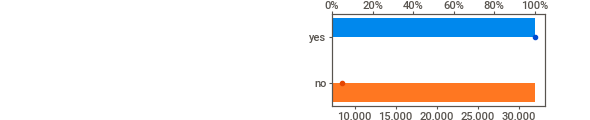
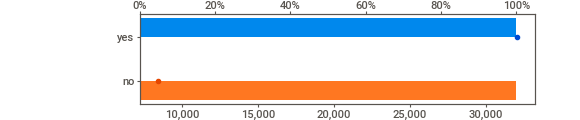
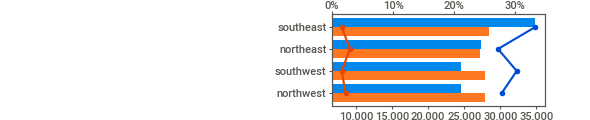
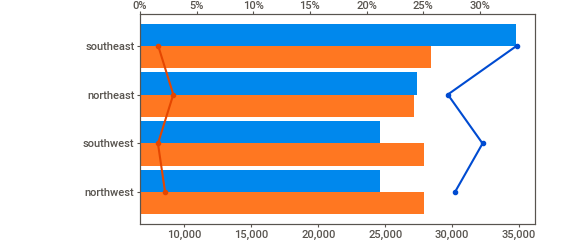
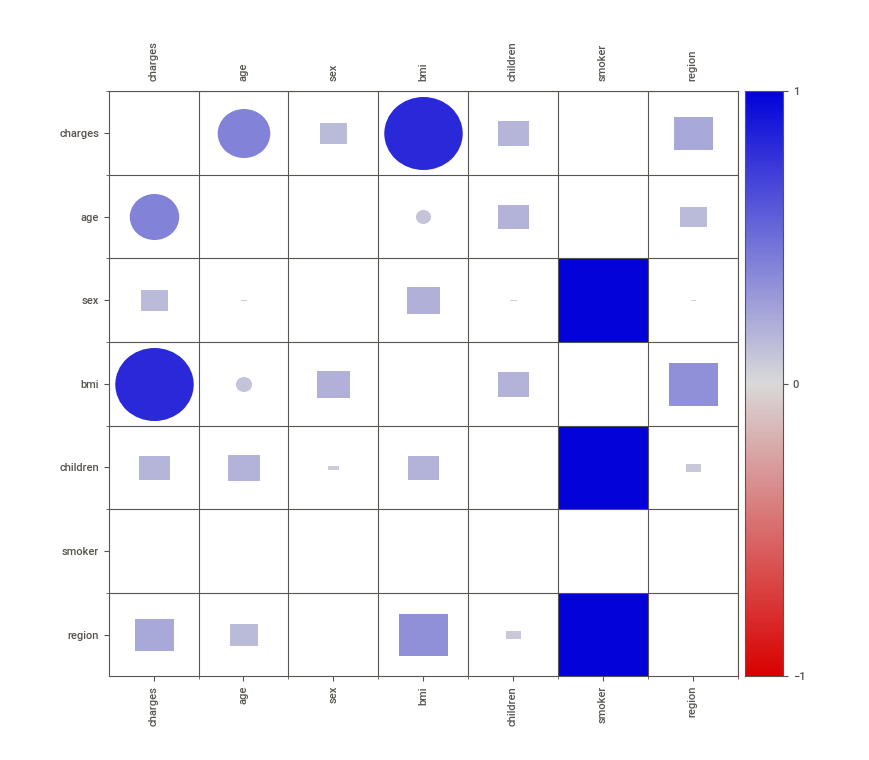
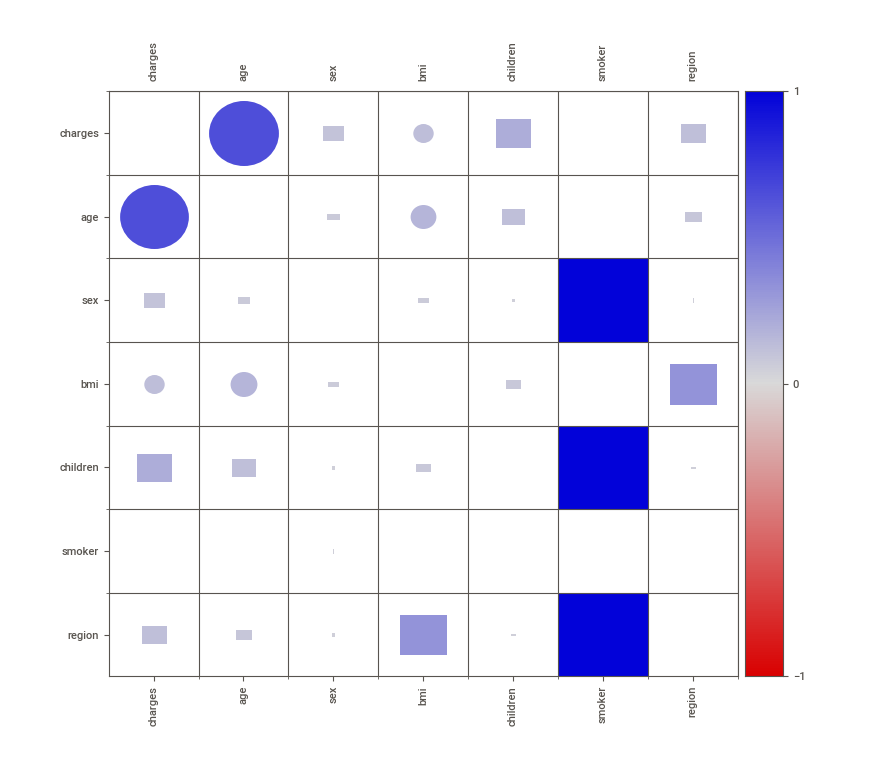

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
eda2.show_notebook()
eda2.show_html(layout = 'vertical')

## **_Mise en place_ para Modelagem**

- Transformar a variável smoker em 0 (não) ou 1 (sim)
- Colocar a variável resposta na escala para cada mil dolares

In [ ]:
dados['smoker'] = dados['smoker'].map({'yes': 1, 'no': 0})
dados['charges'] = dados['charges']/1000

In [ ]:
dados = dados[['bmi', 'smoker', 'charges']]
dados.head()

,bmi,smoker,charges
0,27.900,1,16.884924
1,33.770,0,1.725552
2,33.000,0,4.449462
3,22.705,0,21.984471
4,28.880,0,3.866855


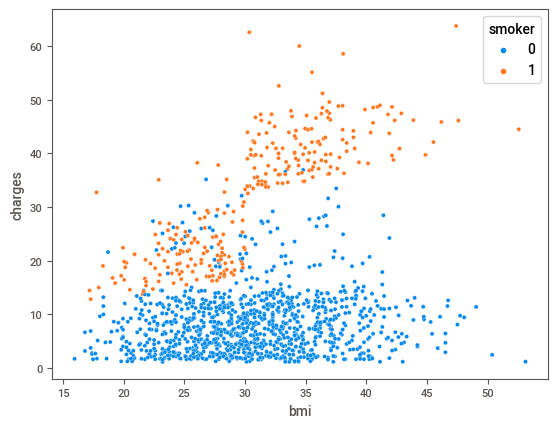

In [ ]:
import seaborn as sns

sns.scatterplot(x = 'bmi', y = 'charges', hue = 'smoker', data = dados);

## Fazer o modelo para prever qual o custos do plano de saúde, dadas as características de uma pessoa. Utilizando Machine Learning (o poder da modelagem).

-  Modelo para prever os custos da variável indíce massa corporal
- Modelo para prever os custos usando tanto o indíce de massa corporal quanto a variável fumante.

In [ ]:
from sklearn.linear_model import LinearRegression

# Modelo para prever a variável CHARGES a partir da BMI

X = dados[['bmi']]
y = dados['charges']

regressao = LinearRegression()
regressao.fit(X, y) #treinamento do modelo

LinearRegression()

In [ ]:
# Resgatando os coeficientes ajustados

print('b0 = ', regressao.intercept_)
print('b1 = ', regressao.coef_ [0] )

b0 =  1.1929372089611512
b1 =  0.3938730307973951


In [ ]:
# Usando o modelo de regressão linear na prática

novos_dados = pd.DataFrame({'bmi': [15, 20, 28, 33]})
regressao.predict(novos_dados)

array([ 7.10103267,  9.07039782, 12.22138207, 14.19074723])

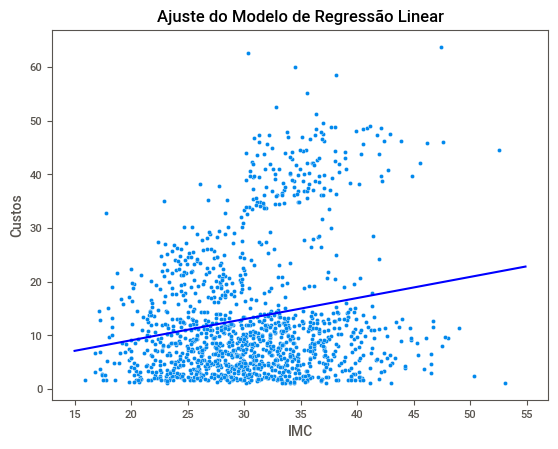

In [ ]:
# Gráfico do Ajuste

b0 = regressao.intercept_
b1 = regressao.coef_

import numpy as np
pontos_em_x = np.arange(15, 55, 0.1)
pontos_em_y = b0 + b1 * pontos_em_x

sns.scatterplot(x = 'bmi', y = 'charges', data = dados)

import matplotlib.pyplot as plt
plt.plot(pontos_em_x, pontos_em_y, color = 'blue')
plt.title('Ajuste do Modelo de Regressão Linear')
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.show()

## **Métrica para Avaliação do Modelo**

In [ ]:
# Erro Quadrático Médio

preditos = regressao.predict(X)
eqm = ((y - preditos)**2).mean()
eqm

140.77790009850756

In [ ]:
from sklearn.metrics import mean_squared_error
eqm = mean_squared_error(y, preditos)

print('EQM da Regressão Linear: {}'.format(round(eqm, 2)))

EQM da Regressão Linear: 140.78


## **Estratégia de Validação do Modelo**

In [ ]:
# Técnica HOLDOUT
from sklearn.model_selection import train_test_split

In [ ]:
train_test_split(X, y, test_size = 0.25)

[         bmi
 690   27.360
 741   29.150
 993   28.270
 1118  35.750
 807   36.575
 ...      ...
 833   34.390
 569   40.565
 198   18.050
 65    28.900
 219   23.210
 
 [1003 rows x 1 columns],
          bmi
 582   45.430
 370   21.090
 59    37.335
 20    36.005
 1301  30.875
 ...      ...
 763   26.030
 1050  36.955
 939   29.480
 195   30.590
 507   23.750
 
 [335 rows x 1 columns],
 690      2.104113
 741     18.246496
 993      5.484467
 1118    38.282750
 807      2.136882
           ...    
 833     11.743934
 569     45.702022
 198      9.644253
 65       1.743214
 219     25.081768
 Name: charges, Length: 1003, dtype: float64,
 582      6.356271
 370     13.415038
 59       5.989524
 20      13.228847
 1301    46.718163
           ...    
 763      3.070809
 1050     8.023135
 939      9.487644
 195      1.639563
 507      3.077095
 Name: charges, Length: 335, dtype: float64]

In [ ]:
# Separar os dados em teste e treinamento
Xtreino, Xteste, ytreino, yteste = train_test_split(X, y, test_size = 0.25)

# Ajustar do modelo nos dados de TREINO
regressao = LinearRegression()
regressao.fit(Xtreino, ytreino)

# Utilizar o modelo ajustado para predizer os dados de TESTE
preditos = regressao.predict(Xteste)

# Calcular o Erro Quadrático Médio nos dados de TESTE
eqm = mean_squared_error(yteste, preditos)
print('EQM : {}'.format(round(eqm, 2)))

EQM : 133.98


In [ ]:
print(Xtreino.shape)
print(Xteste.shape)

(1003, 1)
(335, 1)


**O método Holdout produz resultados com uma certa variabilidade, o que mostra a incerteza sobre a estimativa do EQM do modelo.**

## **Alimentação do Modelo com mais Informações**

In [ ]:
# Considerando o modelo com DUAS variáveis preditoras

X = dados[['bmi', 'smoker']]
y = dados['charges']

In [ ]:
# Repetindo o procedimento de Validação HOLDOUT


Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25)
regressao = LinearRegression()
regressao.fit(Xtreino, ytreino)
preditos = regressao.predict(Xteste)
eqm = mean_squared_error(yteste, preditos)
print('EQM : {}'.format(round(eqm, 2)))

EQM : 41.85


In [ ]:
# Coeficientes
b0 = regressao.intercept_
b1, b2 = regressao.coef_
print('b0 = ', b0)
print('b1 = ', b1)
print('b2 = ', b2)

b0 =  -2.885236263092107
b1 =  0.37447587762607576
b2 =  23.638524464562735


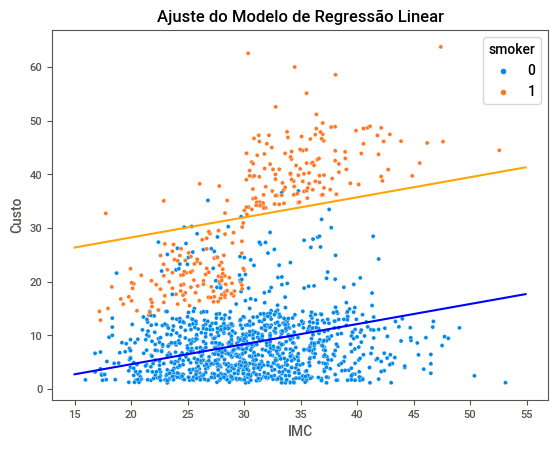

In [ ]:
# Gráfico do Ajuste com DUAS Variáveis

x = np.arange(15, 55, 0.1)
y0 = b0 + b1*x + b2*0
y1 = b0 + b1*x + b2*1

sns.scatterplot(x = 'bmi', y = 'charges', hue = 'smoker', data = dados)
plt.plot(x, y0, color = 'blue')
plt.plot(x, y1, color = 'orange')
plt.title('Ajuste do Modelo de Regressão Linear')
plt.xlabel('IMC')
plt.ylabel('Custo')
plt.show()